<a href="https://colab.research.google.com/github/ErykCud/MLinFin2024/blob/main/DeepLearning_klasyfikacja_chor%C3%B3b_w_ro%C5%9Blinach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=18DbC6Xj4NP-hLzI14WuMaAEyq482vNfn

but Gdown can't. Please check connections and permissions.
unzip:  cannot find or open PlantVillage.zip, PlantVillage.zip.zip or PlantVillage.zip.ZIP.


In [ ]:
!pip install keras

In [ ]:
import numpy as np
import pickle
import cv2
import os
import matplotlib.pyplot as plt
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

In [ ]:
# Dimension of resized image
DEFAULT_IMAGE_SIZE = tuple((128, 128))

# Number of images used to train the model
N_IMAGES = 50

In [ ]:
!unzip /content/drive/MyDrive/archive.zip

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (3652).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (3653).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (3654).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (3655).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (3656).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (3657).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (3658).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (365

In [ ]:
root_dir = '/content/drive/MyDrive'

train_dir = os.path.join(root_dir, 'train')
val_dir = os.path.join(root_dir, 'val')

In [ ]:
os.listdir(train_dir)

['Apple___Apple_scab',
 'Tomato___healthy',
 'Tomato___Early_blight',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Potato___Early_blight',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Cherry___healthy',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Target_Spot',
 'Apple___Cedar_apple_rust',
 'Peach___healthy',
 'Strawberry___healthy',
 'Potato___Late_blight',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Cherry___Powdery_mildew',
 'Squash___Powdery_mildew',
 'Pepper,_bell___healthy',
 'Grape___Black_rot',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Apple___Black_rot',
 'Blueberry___healthy',
 'Potato___healthy',
 'Soybean___healthy',
 'Apple___healthy',
 'Corn___Northern_Leaf_Blight',
 'Corn___Common_rust',
 'Pepper,_bell___Bacterial_spot',
 'Grape___Esca_(Black_Measles)',
 'Peach___Bacterial_spot',
 'Background_without_leaves',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Late_blight',
 'Raspberry___healthy',
 'Corn___heal

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders # or import splitfolders
input_folder = "./Plant_leave_diseases_dataset_with_augmentation"
output = "/content/drive/MyDrive/"

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .1, .1))

ValueError: The provided input folder "./Plant_leave_diseases_dataset_with_augmentation" does not exists. Your relative path cannot be found from the current working directory "/content".

FileNotFoundError: [Errno 2] No such file or directory: './plant_leaf_detection_with_augmentation/'

NameError: name 'root_dir' is not defined

In [ ]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, DEFAULT_IMAGE_SIZE)
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None


image_list, label_list = [], []

try:
    print("[INFO] Loading images ...")
    plant_disease_folder_list = listdir(train_dir)

    for plant_disease_folder in plant_disease_folder_list:
        print(f"[INFO] Processing {plant_disease_folder} ...")
        plant_disease_image_list = listdir(f"{train_dir}/{plant_disease_folder}/")

        for image in plant_disease_image_list[:N_IMAGES]:
            image_directory = f"{train_dir}/{plant_disease_folder}/{image}"
            if image_directory.endswith(".jpg")==True or image_directory.endswith(".JPG")==True:
                image_list.append(convert_image_to_array(image_directory))
                label_list.append(plant_disease_folder)

    print("[INFO] Image loading completed")
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing Apple___Apple_scab ...
[INFO] Processing Tomato___healthy ...
[INFO] Processing Tomato___Early_blight ...
[INFO] Processing Grape___Leaf_blight_(Isariopsis_Leaf_Spot) ...
[INFO] Processing Potato___Early_blight ...
[INFO] Processing Orange___Haunglongbing_(Citrus_greening) ...
[INFO] Processing Cherry___healthy ...
[INFO] Processing Tomato___Septoria_leaf_spot ...
[INFO] Processing Tomato___Target_Spot ...
[INFO] Processing Apple___Cedar_apple_rust ...
[INFO] Processing Peach___healthy ...
[INFO] Processing Strawberry___healthy ...
[INFO] Processing Potato___Late_blight ...
[INFO] Processing Strawberry___Leaf_scorch ...
[INFO] Processing Tomato___Bacterial_spot ...
[INFO] Processing Cherry___Powdery_mildew ...
[INFO] Processing Squash___Powdery_mildew ...
[INFO] Processing Pepper,_bell___healthy ...
[INFO] Processing Grape___Black_rot ...
[INFO] Processing Corn___Cercospora_leaf_spot Gray_leaf_spot ...
[INFO] Processing Apple___Black_rot ...


In [ ]:
try:
    print("[INFO] Loading images ...")
    plant_disease_folder_list = listdir(train_dir)

    for plant_disease_folder in plant_disease_folder_list:
        print(f"[INFO] Processing {plant_disease_folder} ...")
        plant_disease_image_list = listdir(f"{train_dir}/{plant_disease_folder}/")

        for image in plant_disease_image_list[:N_IMAGES]:
            image_directory = f"{train_dir}/{plant_disease_folder}/{image}"
            if image_directory.endswith(".jpg")==True or image_directory.endswith(".JPG")==True:
                image_list.append(convert_image_to_array(image_directory))
                label_list.append(plant_disease_folder)

    print("[INFO] Image loading completed")
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing Apple___Apple_scab ...
[INFO] Processing Tomato___healthy ...
[INFO] Processing Tomato___Early_blight ...
[INFO] Processing Grape___Leaf_blight_(Isariopsis_Leaf_Spot) ...
[INFO] Processing Potato___Early_blight ...
[INFO] Processing Orange___Haunglongbing_(Citrus_greening) ...
[INFO] Processing Cherry___healthy ...
[INFO] Processing Tomato___Septoria_leaf_spot ...
[INFO] Processing Tomato___Target_Spot ...
[INFO] Processing Apple___Cedar_apple_rust ...
[INFO] Processing Peach___healthy ...
[INFO] Processing Strawberry___healthy ...
[INFO] Processing Potato___Late_blight ...
[INFO] Processing Strawberry___Leaf_scorch ...
[INFO] Processing Tomato___Bacterial_spot ...
[INFO] Processing Cherry___Powdery_mildew ...
[INFO] Processing Squash___Powdery_mildew ...
[INFO] Processing Pepper,_bell___healthy ...
[INFO] Processing Grape___Black_rot ...
[INFO] Processing Corn___Cercospora_leaf_spot Gray_leaf_spot ...
[INFO] Processing Apple___Black_rot ...


In [ ]:
np_image_list = np.array(image_list, dtype=np.float16) / 225.0
print()


image_len = len(image_list)
print(f"Total number of images: {image_len}")



label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)

pickle.dump(label_binarizer,open('plant_disease_label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

print("Total number of classes: ", n_classes)

augment = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                             height_shift_range=0.1, shear_range=0.2,
                             zoom_range=0.2, horizontal_flip=True,
                             fill_mode="nearest")


print("[INFO] Splitting data to train and test...")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42)



Total number of images: 3900
Total number of classes:  39
[INFO] Splitting data to train and test...


SyntaxError: unterminated string literal (detected at line 4) (<ipython-input-14-67f912a12a6a>, line 4)

In [ ]:

EPOCHS = 20
STEPS = 100
LR = 1e-3
BATCH_SIZE = 32
WIDTH = 128
HEIGHT = 128
DEPTH = 3


model = Sequential()
inputShape = (HEIGHT, WIDTH, DEPTH)
chanDim = -1

if K.image_data_format() == "channels_first":
    inputShape = (DEPTH, HEIGHT, WIDTH)
    chanDim = 1

model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 activation_7 (Activation)   (None, 128, 128, 32)      0         
                                                                 
 batch_normalization_6 (Bat  (None, 128, 128, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 42, 42, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 42, 42, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 42, 42, 64)       

In [ ]:
from keras.optimizers import Adam

# Initialize optimizer
opt = Adam(learning_rate=LR)

# Compile model
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

# Train model
print("[INFO] Training network...")
history = model.fit(augment.flow(x_train, y_train, batch_size=BATCH_SIZE),
                    validation_data=(x_test, y_test),
                    steps_per_epoch=len(x_train) // BATCH_SIZE,
                    epochs=EPOCHS,
                    verbose=1)

[INFO] Training network...
Epoch 1/20
97/97 [==============================] - 20s 163ms/step - loss: 0.0304 - accuracy: 0.8400 - val_loss: 0.1634 - val_accuracy: 0.3744
Epoch 2/20
97/97 [==============================] - 15s 156ms/step - loss: 0.0286 - accuracy: 0.8540 - val_loss: 0.0300 - val_accuracy: 0.8359
Epoch 3/20
97/97 [==============================] - 15s 157ms/step - loss: 0.0299 - accuracy: 0.8478 - val_loss: 0.0417 - val_accuracy: 0.7821
Epoch 4/20
97/97 [==============================] - 15s 155ms/step - loss: 0.0267 - accuracy: 0.8692 - val_loss: 0.1293 - val_accuracy: 0.4269
Epoch 5/20
97/97 [==============================] - 15s 157ms/step - loss: 0.0242 - accuracy: 0.8760 - val_loss: 0.0831 - val_accuracy: 0.7462
Epoch 6/20
97/97 [==============================] - 15s 155ms/step - loss: 0.0250 - accuracy: 0.8795 - val_loss: 0.1601 - val_accuracy: 0.3974
Epoch 7/20
97/97 [==============================] - 15s 156ms/step - loss: 0.0246 - accuracy: 0.8821 - val_loss: 0.

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')

25/25 [==============================] - 0s 13ms/step - loss: 0.0316 - accuracy: 0.8615
Test loss: 0.0316
Test accuracy: 0.8615


In [ ]:
from sklearn.metrics import classification_report

# Predict classes for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate classification report
report = classification_report(y_true_classes, y_pred_classes)
print(report)


25/25 [==============================] - 1s 20ms/step
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        25
           1       0.86      1.00      0.93        25
           2       1.00      1.00      1.00        22
           3       1.00      0.80      0.89        20
           4       1.00      1.00      1.00        17
           5       0.95      1.00      0.98        20
           6       1.00      0.92      0.96        13
           7       1.00      0.96      0.98        23
           8       0.83      0.83      0.83        12
           9       1.00      1.00      1.00        14
          10       0.89      0.85      0.87        20
          11       1.00      1.00      1.00        17
          12       0.93      0.81      0.87        16
          13       0.91      1.00      0.95        20
          14       1.00      0.70      0.82        23
          15       1.00      1.00      1.00        24
          16       1.00    

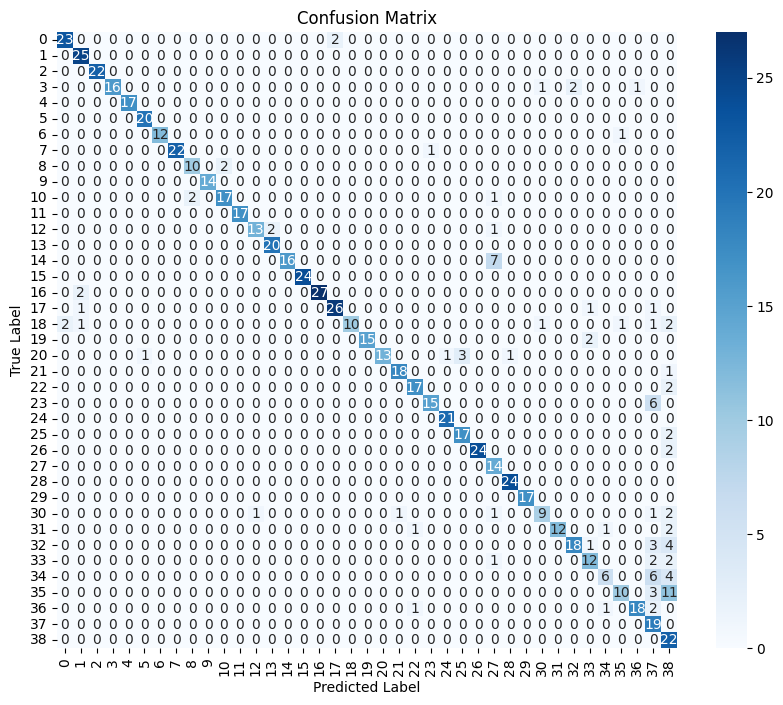

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
